## Machine Learning: Lidando com dados de muitas dimensões

#### Workflow:
1. Entrada de dados;
2. Pré-processamento e transformação nos dados;
3. Construção do modelo e segregação em dados de treino e teste;
4. Teste e validação do modelo de ML (caso o resultado não tenha sido o esperado, volta-se ao passo 3);
5. Implementação do modelo de ML.

#### Foco do curso:
Pré-processamento e transformação nos dados;

### ALURA CARE:
Será que é possível reduzir o número de exames no diagnóstico de um tipo de câncer?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
resultados_exames = pd.read_csv(uri)
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
from sklearn.model_selection import train_test_split

SEED = 123143
np.random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [4]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [5]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x, teste_y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

<b>Ocorreu um erro:</b> existe na base de dados valores NaN (valores vazios).

### Lidando com uma coluna de valores NaN:

In [6]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [7]:
419/len(resultados_exames['exame_33'])

0.7363796133567663

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

SEED = 123143
np.random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns=['exame_33'])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação: %.2f%%" %(classificador.score(teste_x, teste_y)*100))

Resultado da classificação: 92.40%


### Definindo um baseline e comparando com o algoritmo RandomForestClassifier:

DummyClassifier foi escolhido como algoritmo baseline. As classificações desse algoritmo têm como base o item que mais aparece na base. Se Y=A aparece mais, ele só prevê A. Se Y=B aparece mais, ele só prevê B.

In [9]:
from sklearn.dummy import DummyClassifier

SEED = 123143
np.random.seed(SEED)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba: %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba: 66.67%


### Construindo uma visualização:
1. Valores dos exame considerando o resultado benigno ou maligno:

In [10]:
valores_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [11]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)

In [12]:
dados_plot

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


In [13]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

In [14]:
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.9900
1,M,exame_1,20.5700
2,M,exame_1,19.6900
3,M,exame_1,11.4200
4,M,exame_1,20.2900
...,...,...,...
5685,M,exame_10,0.1726
5686,M,exame_10,0.1752
5687,M,exame_10,0.1590
5688,M,exame_10,0.2397


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

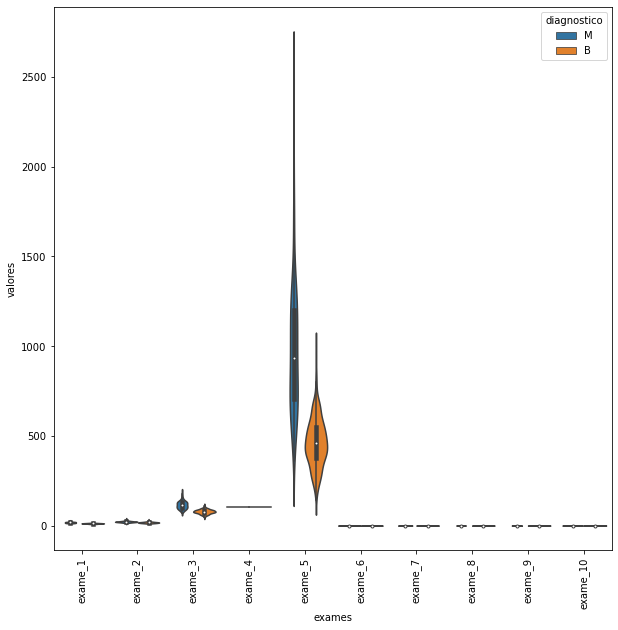

In [15]:
plt.figure(figsize=(10,10))
sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

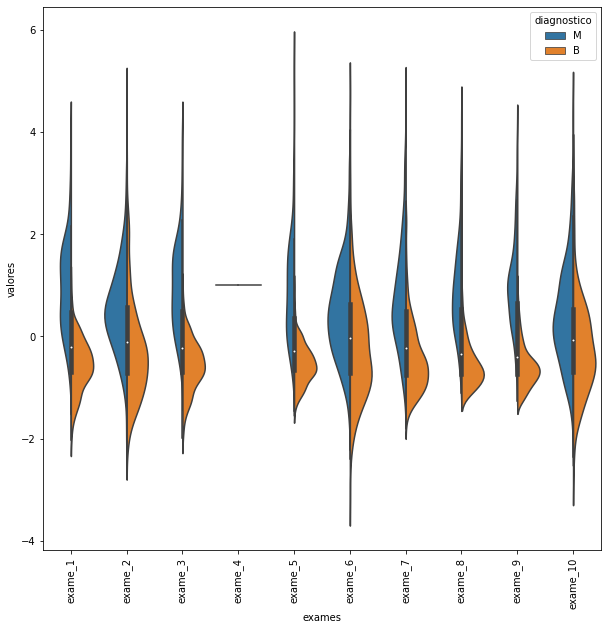

In [16]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10,10))
sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True)
plt.xticks(rotation=90)

In [17]:
valores_exames_v1['exame_4']

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

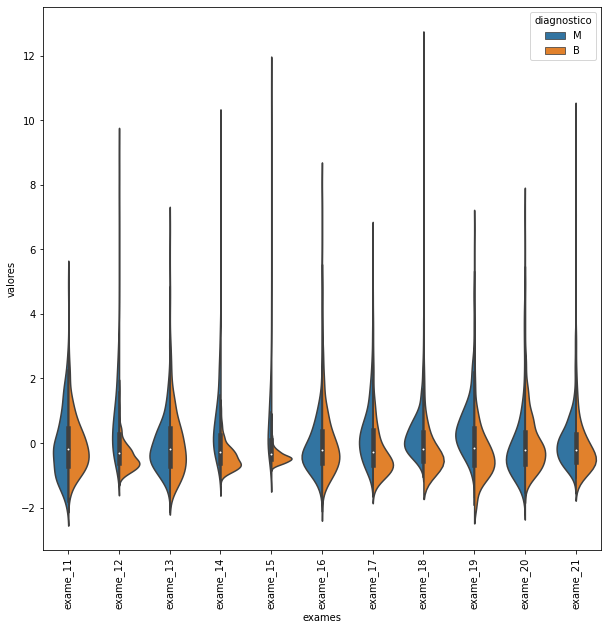

In [18]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")
    plt.figure(figsize=(10,10))
    sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True)
    plt.xticks(rotation=90)
    
grafico_violino(valores_exames_v2, 10, 21)

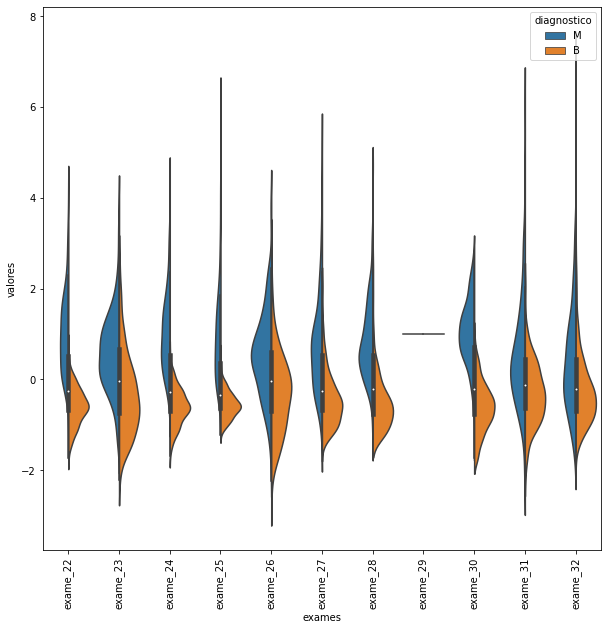

In [19]:
grafico_violino(valores_exames_v2, 21, 32)

In [20]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

In [21]:
def classificar(valores):
    SEED = 1234
    np.random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)
    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação: %.2f%%" %(classificador.score(teste_x, teste_y)*100))

In [22]:
classificar(valores_exames_v3)

Resultado da classificação: 92.98%


O fato de retirar as variáveis 'exame_29' e 'exame_4' da base não impactou na capacidade de classificação do modelo.

### Correlação entre as variáveis:

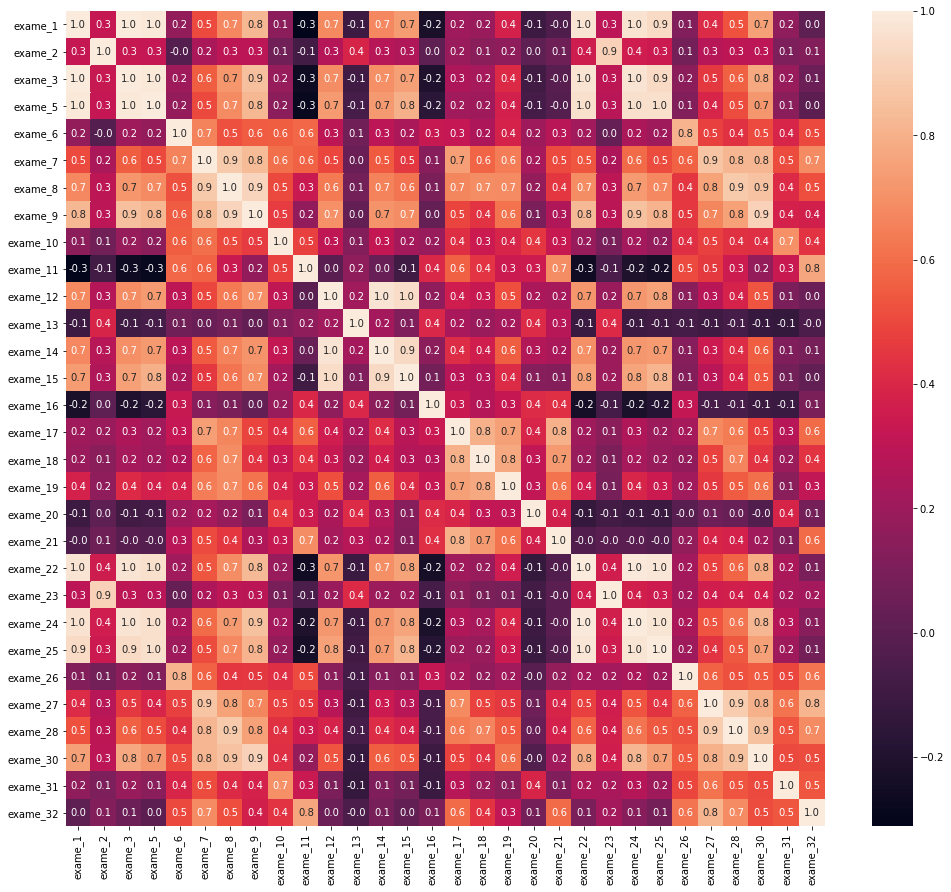

In [23]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')

In [24]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [26]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [27]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [28]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [29]:
valores_exames_v4.keys()

Index(['exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9',
       'exame_10', 'exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [30]:
classificar(valores_exames_v4)

Resultado da classificação: 91.81%


A capacidade de classificação diminuiu, ou seja, não deveria ter sido tirado todas as variáveis. Se duas são correlacionadas, tira-se 1, mas deixa-se a outra.

In [31]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
classificar(valores_exames_v5)

Resultado da classificação: 92.98%


### Seleção das K melhores features:

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)

In [33]:
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x000001D08B9F5A60>)

In [34]:
valores_exames_v6 = valores_exames_v1.drop(columns=(['exame_4', 'exame_29', 'exame_3', 'exame_24']))

SEED = 1234
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
selecionar_kmelhores.fit(treino_x, treino_y)

SelectKBest(k=5, score_func=<function chi2 at 0x000001D08B9F5A60>)

In [35]:
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [36]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação: %.2f%%" %(classificador.score(teste_kbest, teste_y)*100))

Resultado da classificação: 92.40%


### Matriz de confusão:

In [37]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [38]:
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(61.5, 0.5, 'Real'), Text(0.5, 43.5, 'Predição')]

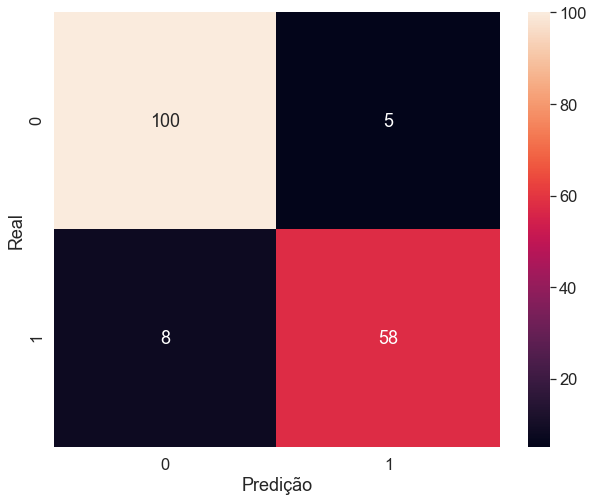

In [39]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel="Predição", ylabel="Real")

De 105 casos de cêncer benigno, 100 foram diagnosticados corretamente e 5 não corretamente. De 66 casos de câncer maligno, 58 foram diagnosticados corretamente pelo modelo e 8 de forma errônea.

### RFE:
Eliminação de feature por recursão.

In [40]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação por RFE: %.2f%%" %(classificador.score(teste_rfe, teste_y)*100))

Resultado da classificação por RFE: 90.06%


[Text(61.5, 0.5, 'Real'), Text(0.5, 43.5, 'Predição')]

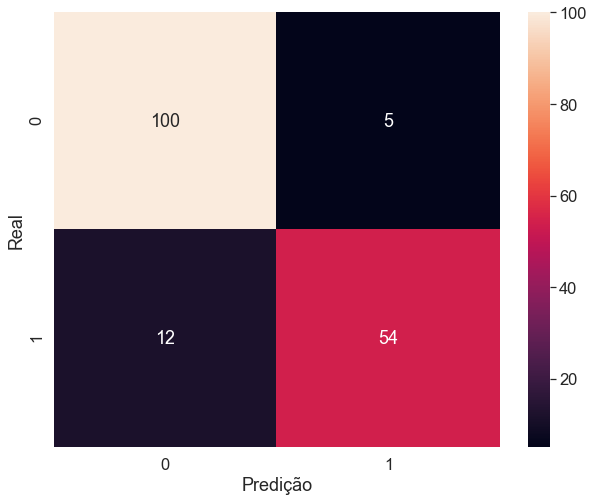

In [41]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel="Predição", ylabel="Real")

De 105 casos de cêncer benigno, 100 foram diagnosticados corretamente e 5 não corretamente. De 66 casos de câncer maligno, 54 foram diagnosticados corretamente pelo modelo e 12 de forma errônea.

### RFECV
Existe algum conjunto de dados que traz o melhor score?

In [42]:
from sklearn.feature_selection import RFECV

SEED = 1234
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)
print("Resultado da classificação por RFE: %.2f%%" %(classificador.score(teste_rfecv, teste_y)*100))

Resultado da classificação por RFE: 92.98%


[Text(61.5, 0.5, 'Real'), Text(0.5, 43.5, 'Predição')]

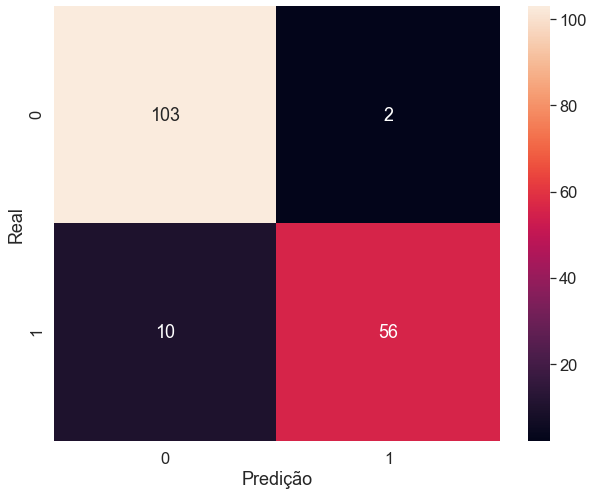

In [43]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel="Predição", ylabel="Real")

De 105 casos de cêncer benigno, 103 foram diagnosticados corretamente e 2 não corretamente. De 66 casos de câncer maligno, 56 foram diagnosticados corretamente pelo modelo e 10 de forma errônea.

In [44]:
selecionador_rfecv.n_features_

26

In [45]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [46]:
selecionador_rfecv.grid_scores_ # Scores de vários algoritmos testados (o primeiro com apenas 1 exame, o último com 28 exames)

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

In [47]:
len(selecionador_rfecv.grid_scores_) # Número de algoritmos testados

28

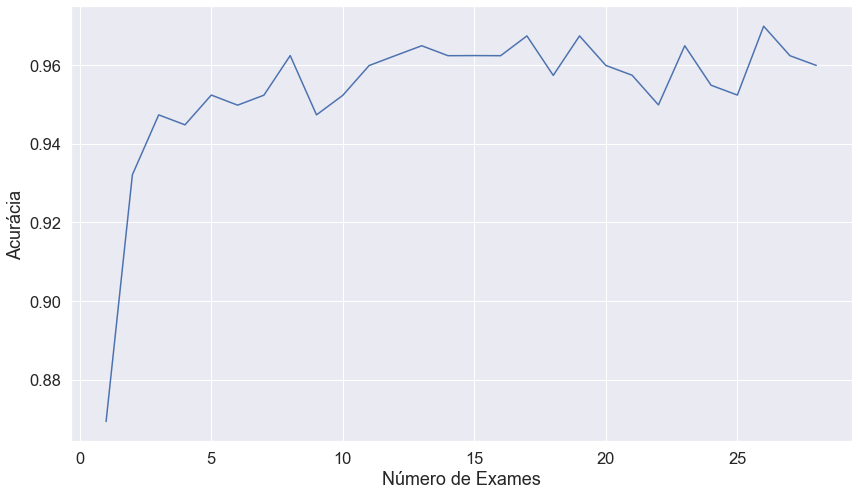

In [48]:
plt.figure(figsize=(14,8))
plt.xlabel("Número de Exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)

### Visualizando dados no plano

In [49]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

RandomForestClassifier(random_state=1234)

In [50]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [51]:
valores_exames_v7.shape

(569, 2)

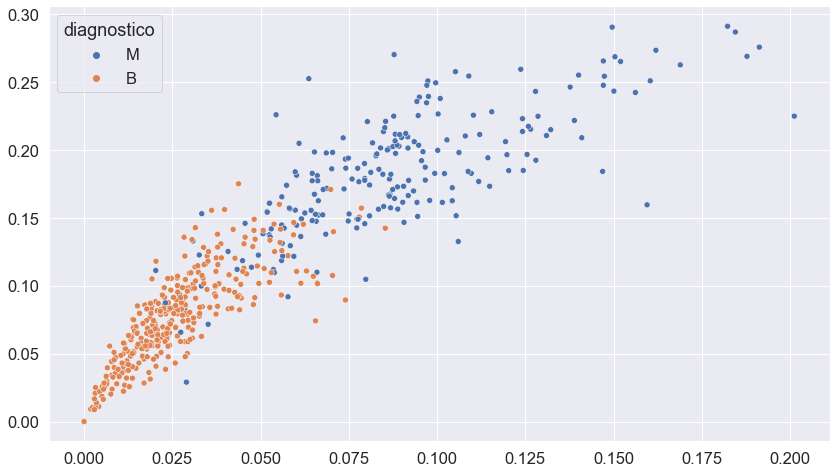

In [52]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue=diagnostico)

### PCA:
Uma forma de ver os dados com dimensionalidade reduzida sem perder informações como no exemplo acima.

In [53]:
from sklearn.decomposition import PCA

pca =PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

In [54]:
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

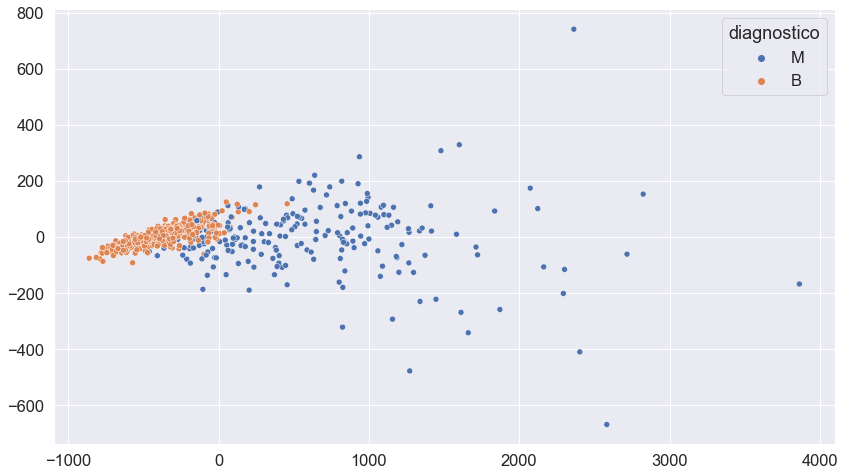

In [55]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)

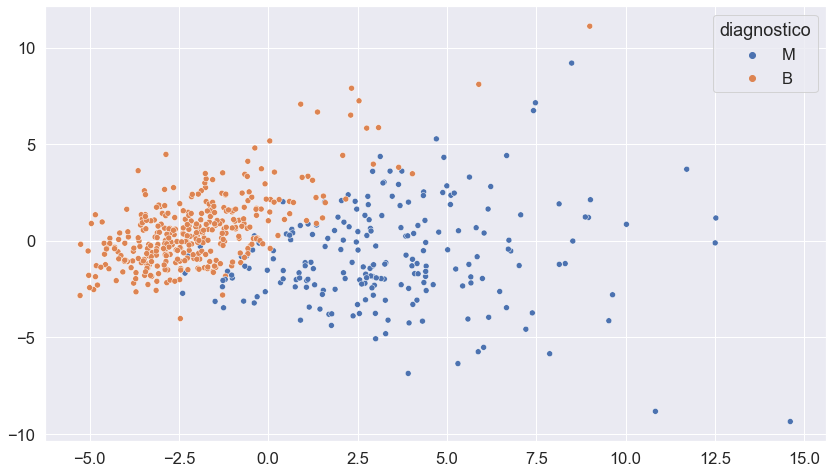

In [56]:
from sklearn.decomposition import PCA

pca =PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)

### TSNE:
Mantem proporcionalmente em 2 dimensões a diferença entre observações em n dimensões.

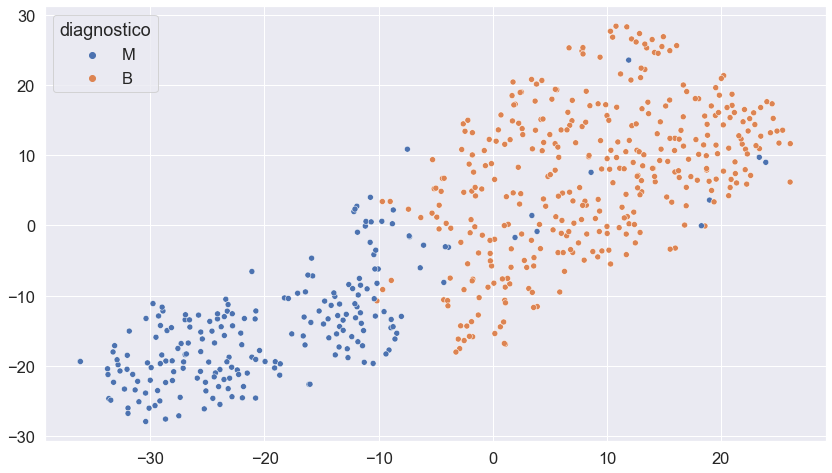

In [57]:
from sklearn.manifold import TSNE

tsne =TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v9[:,0], y=valores_exames_v9[:,1], hue=diagnostico)